Customer Segmentation and Analysis

In this project, we will work with a e-commerce dataset that contains information about customer demographics, purchasing history, and other relevant factors. Our objective is to identify customer segments that exhibit similar behavior, preferences, and needs, and to develop targeted marketing strategies to effectively engage with each segment.

Importing necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Reading the file

In [25]:
data = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/codtech internship/ecommerce_customer_data.csv")

Creating a Dataframe

In [26]:
df = pd.DataFrame(data)

In [27]:
df.head()

,User_ID,Gender,Age,Location,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,60,30,1,0
1,2,Male,25,Kolkata,30,38,9,4
2,3,Male,32,Bangalore,37,13,5,0
3,4,Male,35,Delhi,7,20,10,3
4,5,Male,27,Bangalore,35,20,8,2


In [28]:
df.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


Checking for null values

In [29]:
df.isnull()

,User_ID,Gender,Age,Location,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


Converting categorical data into numerical data

In [30]:
df['Gender'] = df['Gender'].map({'Male':0,
                                 'Female':1})

In [31]:
df['Location'] = df['Location'].map({'Ahmedabad':1,
                                     'Bangalore':2,
                                     'Chennai':3,
                                     'Delhi':4,
                                     'Hyderabad':5,
                                     'Kolkata':6,
                                     'Mumbai':7,
                                     'Pune':8})

Preprocessing: Standardizing the dataset

In [32]:
scaler = StandardScaler()
scores_std = scaler.fit_transform(df)

Performing PCA to reduce dimensions

In [33]:
pca = PCA(n_components = 3)
scores_pca = pca.fit_transform(scores_std)

Visualizing the components vs original features

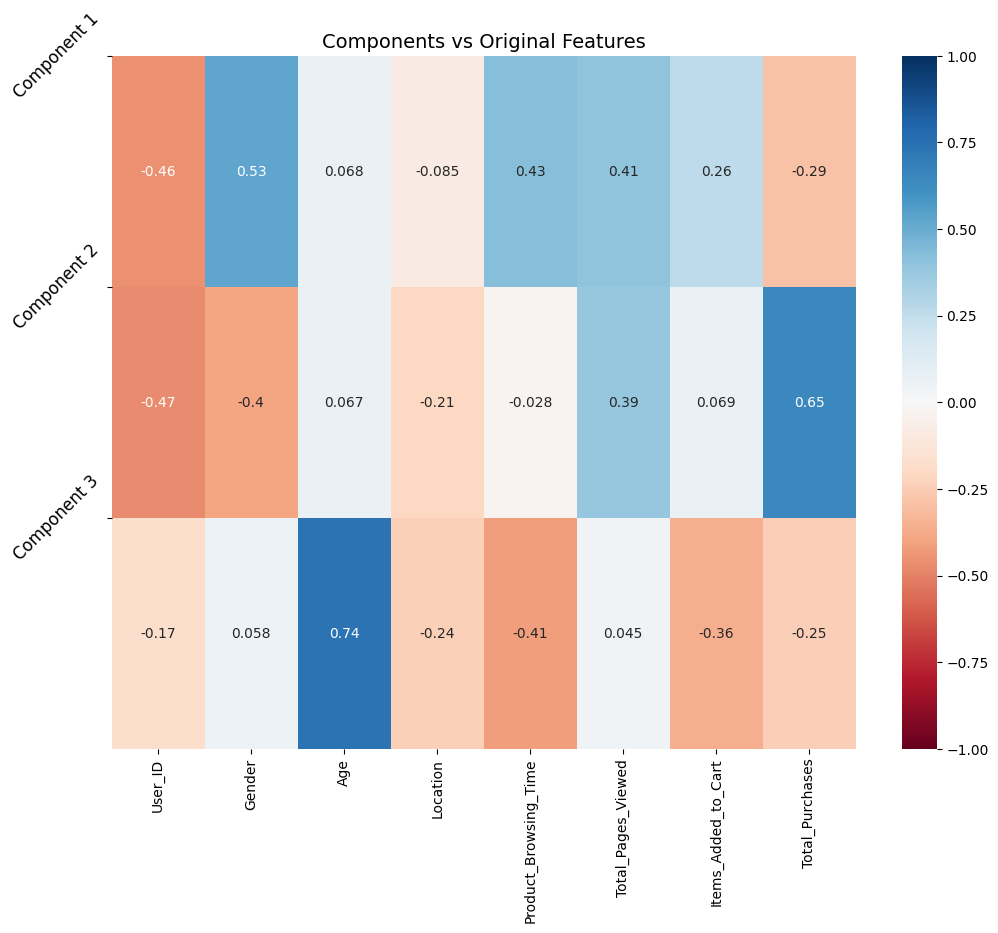

In [34]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2],
            ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

Choosing the number of clusters using Elbow Method

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

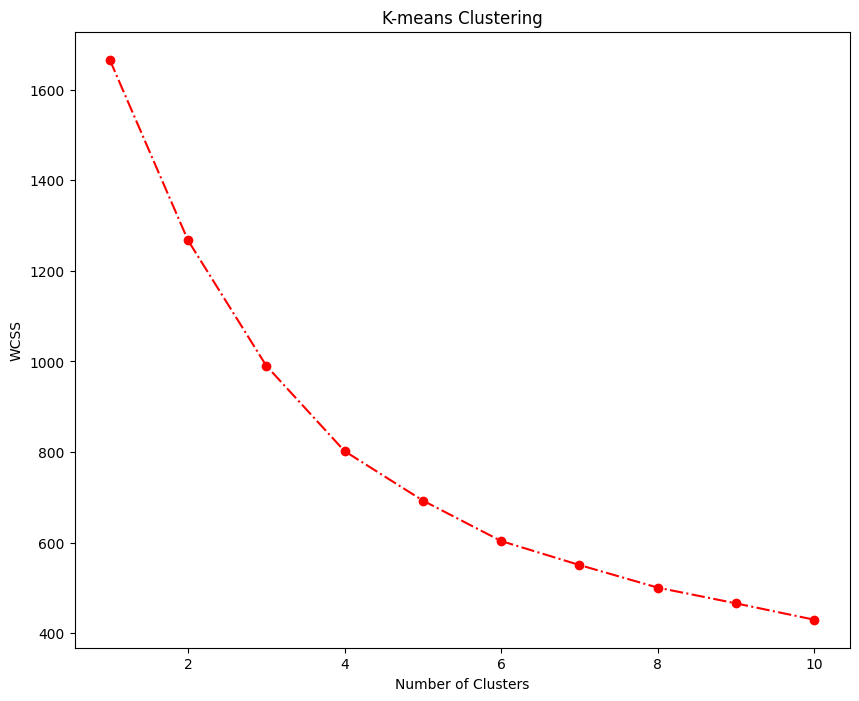

In [35]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Performing K-means clustering with 4 clusters

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(scores_pca)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Creating a new dataframe with the original dataset, PCA scores, and K-means labels

In [43]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Gender']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename(columns = {'Segment K-means PCA':'Segment'})

Checking the final output

In [44]:
print(df_segm_pca_kmeans_freq.head())

                        User_ID    Gender        Age  Location   
Segment K-means PCA                                              
0                    370.000000  0.523810  24.230159  5.285714  \
1                    173.368852  0.860656  29.336066  3.860656   
2                    187.269841  0.396825  22.888889  4.642857   
3                    268.912698  0.142857  28.746032  4.214286   

                     Product_Browsing_Time  Total_Pages_Viewed   
Segment K-means PCA                                              
0                                30.047619           17.984127  \
1                                33.319672           32.639344   
2                                39.071429           32.507937   
3                                20.603175           25.769841   

                     Items_Added_to_Cart  Total_Purchases  Component 1   
Segment K-means PCA                                                      
0                               5.182540         1.507937 

Concluison: 

We can observe that each segment has different characteristics. For example, Segment 0 has the highest User ID and the lowest Age, while Segment 1 has the lowest User ID and the highest Age. These differences in characteristics can be used to target specific segments with different marketing strategies.

For example, Segment 0 could be targeted with promotions that highlight the value of their products, while Segment 1 could be targeted with promotions that emphasize the quality and luxury of their products.




